# Project 1: SAT & ACT Analysis

Define the problem you are finding answers for from the data given.

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement
The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward **non-technical** executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in **Ohio**.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
- There is a very wide range in terms of participation percentage across the states, for both SAT and ACT. 
- In states where there is higher %tage of participants for one test, the other test has lower %tage of participants.
- In states with lower participation, average total scores seem to be higher.
- Reading scores generally seem to be higher than Math scores for both SAT and ACT.
- 60% of students nationwide took ACT, which means 40% took SAT.

#### 4a. Does the data look complete? 

Answer: Yes, data for all 50 states in the US.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
- SAT possible score range: 400 - 1600; subtest: 200 - 800
- ACT possible score range: 1-36; subtest: 1-36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
# gain a quick overview of the data stats for SAT 2017 in each column using describe()
sat_2017_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


From the describe() method, it can be seen that there is an outlier for 'min' in Math, as the minimum possible score is 200.

In [6]:
sat_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


From .info(), it can be seen that there are no null values.

In [7]:
#filter dataframe to show any entries for Math with score lower than 200 
sat_2017_df.loc[(sat_2017_df['Math'] < 200)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


The average score entry for Math in Maryland is wrong.
From the website https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/, avg Math score for Maryland is 524.

In [8]:
#input right data
#use .at[row,column] = correct value
sat_2017_df.at[20,'Math'] = 524

In [9]:
#display updated Math entry in Maryland
sat_2017_df.iloc[20:21,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [10]:
#describe() for ACT 2017
act_2017_df.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


From decribe() for ACT 2017, the min for Science seems to be an outlier.

In [11]:
#info() for ACT 2017
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [12]:
#filter ACT 2017 df to display which entry is the outlier.
act_2017_df.loc[(act_2017_df['Science'] < 10)]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Again for Maryland, there seems to be a wrong entry. Checking from https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows, this confirms that the Science score should be 23.2

In [13]:
act_2017_df.at[21,'Science'] = 23.2

In [14]:
#display corrected row
act_2017_df.iloc[21:22,:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
#code
print(f'sat_2017_df data types: \n {sat_2017_df.dtypes}')
print('')
print(f'act_2017_df data types: \n {act_2017_df.dtypes}')

sat_2017_df data types: 
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

act_2017_df data types: 
 State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
- Data type for composite column in ACT 2017 is object, but should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
#code
#function to convert percentage to float type. args: df - the dataframe name, col_name - column name of column to change dtype
def percentage_converter(df, col_name):
    df[col_name] = df[col_name].map(lambda x: float((int(x.replace('%','')))/100))
    return df

In [17]:
percentage_converter(sat_2017_df, 'Participation').head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [18]:
percentage_converter(act_2017_df, 'Participation').head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#Convert 'Composite' in ACT 2017 to float type
act_2017_df['Composite'] = act_2017_df['Composite'].map(lambda x: float(x))

Running the code gives a ValueError: could not convert string to float: '20.2x'. Apparently there is a 20.2x in one of the Composite entries.

In [19]:
#filter ACT 2017 df 'Composite' column to show where 20.2x is
act_2017_df.loc[act_2017_df['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2x


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#code
#Fix the '20.2x' in the ACT 2017 'Composite' col
act_2017_df.at[51,'Composite'] = '20.2'

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#code
act_2017_df['Composite'] = act_2017_df['Composite'].map(lambda x: float(x))
act_2017_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [22]:
#Code:
act_2017_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
#code
sat_2017_df.columns = ['state', 'sat_participation_2017', 'sat_reading_writing_2017', 'sat_math_2017', 'sat_total_2017']
act_2017_df.columns = ['state', 'act_participation_2017', 'act_english_2017', 'act_math_2017', 'act_reading_2017', 'act_science_2017', 'act_composite_2017']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|-------|----|-------|-----------|
|State  |*str*|2017/2018 SAT/ACT data|All the states in the US|  
|Participation|*float*|2017/2018 SAT/ACT data|The participation rate expressed as a float from 0 to 1, of each state taking part in the SAT/ACT exam, column name in format: test_participation_year; e.g. act_participation_2017
|Subject test score for SAT/ACT|*int/float*|2017 SAT/ACT & 2018 SAT data|The average score obtained for the subject for each state, column name format: test_subject_year; e.g sat_math_2018
|Total for SAT|*int*|2017/2018 SAT data|The average score from the 2 subtests summed together, column name format: sat_total_year
|Composite for ACT|*float*|2017/2018 ACT data|The average of the scores from the 4 subtests, column name format: act_composite_year

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#code
act_2017_df.drop(0, inplace=True)

In [25]:
act_2017_df.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code:
combined_2017 = pd.merge(sat_2017_df,
                              act_2017_df,
                              how='outer',
                              on='state')
combined_2017.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#code
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [28]:
#import SAT/ACT 2018 data
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018.csv')

In [29]:
#describe() and info() to get an overview of the data and to see if there is anything that is odd with the dataset
print(sat_2018_df.describe()) 
print('')
print(sat_2018_df.info())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.500000
50%                            552.000000  544.000000  1098.000000
75%                            610.500000  593.500000  1204.000000
max                            643.000000  655.000000  1298.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int6

- *From describe() the SAT 2018 data seems to be in the acceptable ranges of each parameter.* <br>
- *From info(), the SAT 2018 data does not have any null entries.*

In [30]:
print(act_2018_df.describe())
print('')
print(act_2018_df.info())

       Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None


- *From decribe(), ACT 2018 data seems to be okay, but have only Composite data instead of breakdown of subjects like 2017 data.*
- *From info(), ACT 2018 data entries for 51 states, but there are only 50 states for US. Probably means there is a duplicate entry.*

In [31]:
# Change participation values in SAT & ACT 2018 from str to float
percentage_converter(sat_2018_df, 'Participation').head()
percentage_converter(act_2018_df, 'Participation').head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [32]:
# check all variables are correct datatype
print(sat_2018_df.dtypes)
print('')
print(act_2018_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
Composite        float64
dtype: object


In [33]:
# Check ACT 2018 dataframe to see if there are any duplicate entries.
act_2018_df[act_2018_df.duplicated('State') == True]

,State,Participation,Composite
20,Maine,0.07,24.0


In [34]:
# Remove the duplicate entry in the ACT 2018 dataset
act_2018_df.drop(act_2018_df.index[20], inplace=True)

In [35]:
# Check ACT 2018 dataframe
act_2018_df.loc[19:21]

,State,Participation,Composite
19,Maine,0.07,24.0
21,Maryland,0.31,22.5


In [36]:
# Check which state in the 'State' column in SAT & ACT 2018 are different
act_2018_df['State'].isin(sat_2018_df['State']).value_counts()

True     50
False     1
Name: State, dtype: int64

In [37]:
# See which states are not the same between the two dataframes
act_2018_df['State'][act_2018_df['State'].values != sat_2018_df['State'].values]

8     District of columbia
36                    Ohio
37                Oklahoma
Name: State, dtype: object

In [38]:
# Convert 'State' column values in both df's to set(), and find any values that are not in the other set
set(act_2018_df['State'].values).symmetric_difference(set(sat_2018_df['State'].values))

{'District of Columbia', 'District of columbia'}

In [39]:
# Replace District of columbia with District of Columbia in ACT 2018
act_2018_df.loc[8, 'State'] = 'District of Columbia'

In [40]:
# Change column names
sat_2018_df.columns = ['state', 'sat_participation_2018', 'sat_reading_writing_2018', 'sat_math_2018', 'sat_total_2018']
act_2018_df.columns = ['state', 'act_participation_2018', 'act_composite_2018']

In [41]:
act_2018_df.head()

,state,act_participation_2018,act_composite_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [42]:
sat_2018_df.head()

,state,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [43]:
combined_2018 = pd.merge(sat_2018_df, act_2018_df, how='outer', on='state')
combined_2018.head()

,state,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [44]:
final = pd.merge(combined_2017, combined_2018, how='outer', on='state')
final.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [45]:
# check number of rows in final
final.shape[0]

51

In [46]:
# save final dataframe as final.csv
combined_2017.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [47]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_reading_writing_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [48]:
def std_dev(df, col):
    big_sigma = 0 # assign capital sigma as 0 first
    mean = np.mean(np.array(df[col].values))
    for v in list(df[col].values): # loop through the column values and calculate the summation part of the std_dev
        big_sigma += (v - mean)**2
    std_dev = math.sqrt(big_sigma/len(list(df[col].values))) # calculate the std_dev
    return std_dev


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
# Perform std_dev() for all columns in 'final' df, if datatype is not a string
sd = {col: std_dev(final, col) for col in final.columns if final[col].dtype != 'O'}
sd

{'sat_participation_2017': 0.3492907076664507,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 0.3694661922353941,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.3370173582041031,
 'act_composite_2018': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [50]:
#Test using np.std()
np_sd = {col: np.std(final[col]) for col in list(final.columns) if final[col].dtype != 'O'}
np_sd

{'sat_participation_2017': 0.3492907076664507,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 0.3694661922353942,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178}

Answer: **Manually calculated std's do not match up with output from pandas describe(), but are the same compared to numpy's std(). This is because ddof for pandas defaults to 1. To get the same results for std in pandas, have to change ddof to 0.**

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 2017 Participation

### SAT 2017

In [51]:
#code
# Find states with lowest participation rates for SAT 2017
final.sort_values(by='sat_participation_2017').head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4


In [52]:
# Find states with highest participation rates for SAT 2017
final.sort_values(by='sat_participation_2017',ascending=False).head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1


**SAT 2017: <br>**
**States with lowest participation rates (2%) (3 states total):**
- North Dakota
- Mississippi
- Iowa <br>

**States with highest participation rates (100%) (4 states total):**
- District of Columbia
- Michigan
- Connecticut
- Delaware

### ACT 2017

In [53]:
# Filter states with lowest participation rates for ACT 2017
final[final['act_participation_2017'] == min(list(final['act_participation_2017'].values))]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0


In [54]:
# Filter states with highest participation rates for ACT 2017
act2017_hpar = final[final['act_participation_2017'] == max(list(final['act_participation_2017'].values))]
act2017_hpar.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
3,Arkansas,0.03,614,594,1208,1.0,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.0,19.4
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.3,23.9
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
18,Louisiana,0.04,611,586,1198,1.0,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.0,19.2


In [55]:
print(act2017_hpar['state'].values)
print(len(act2017_hpar['state'].values))

['Alabama' 'Arkansas' 'Colorado' 'Kentucky' 'Louisiana' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nevada' 'North Carolina' 'Oklahoma'
 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin' 'Wyoming']
17


**ACT 2017: <br>**
**States with lowest participation rates (8%) (1 state total):**
- Maine<br>

**States with highest participation rates (100%) (17 states total):**
- Listed above

In [56]:
# Filter to show states where 2017 participation rates are greater than or equal to 50% for both tests
(final[(final['act_participation_2017'] >= 0.5) & (final['sat_participation_2017'] >= 0.5)])[['state', 'act_participation_2017', 'sat_participation_2017']]

,state,act_participation_2017,sat_participation_2017
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.90,0.55
40,South Carolina,1.00,0.50


#### **2017 Participation rates analysis:**
- Overall, more students seem to take ACT as compared to SAT.
    - There is only 1 state for which participation is lowest for ACT, whereas SAT has 3 states. Lowest participation is 8% for ACT, as compared to 3% for SAT.
    - ACT has 100% participation for 17 states in total, as compared to only 4 states for SAT
- States with 100% SAT participation have relatively high ACT takers as compared to SAT takers in states with 100% ACT participation.

### 2018 Participation

### SAT 2018

In [57]:
# SAT 2018 lowest participation
final[final['sat_participation_2018'] == min(list(final['sat_participation_2018'].values))]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3


In [58]:
# SAT 2018 highest participation
final[final['sat_participation_2018'] == max(list(final['sat_participation_2018'].values))]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.0,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.0,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.0,508,493,1001,0.36,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.0,511,499,1011,0.22,24.2


### ACT 2018

In [59]:
# ACT 2018 lowest participation
final[final['act_participation_2018'] == min(list(final['act_participation_2018'].values))]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0


In [60]:
# ACT 2018 highest participation
act2018_hpar = final[final['act_participation_2018'] == max(list(final['act_participation_2018'].values))]
act2018_hpar.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
3,Arkansas,0.03,614,594,1208,1.0,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.0,19.4
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
18,Louisiana,0.04,611,586,1198,1.0,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.0,19.2
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.0,18.6


In [61]:
print(act2018_hpar['state'].values)
print(len(act2018_hpar['state'].values))

['Alabama' 'Arkansas' 'Kentucky' 'Louisiana' 'Mississippi' 'Missouri'
 'Montana' 'Nebraska' 'Nevada' 'North Carolina' 'Ohio' 'Oklahoma'
 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin' 'Wyoming']
17


In [62]:
# Filter to show states where 2018 participation rates are greater than or equal to 50% for both tests
(final[(final['act_participation_2018'] >= 0.5) & (final['sat_participation_2018'] >= 0.5)])[['state', 'act_participation_2017', 'sat_participation_2017', 'act_participation_2018', 'sat_participation_2018']]

,state,act_participation_2017,sat_participation_2017,act_participation_2018,sat_participation_2018
9,Florida,0.73,0.83,0.66,0.56
10,Georgia,0.55,0.61,0.53,0.70
11,Hawaii,0.90,0.55,0.89,0.56
33,North Carolina,1.00,0.49,1.00,0.52
40,South Carolina,1.00,0.50,1.00,0.55


#### **2018 Participation rates analysis:**
- Overall, still more students seem to take ACT as compared to SAT.
    - However, there is now 5 states with 100% SAT participation:
- States with 100% SAT participation have relatively high ACT takers as compared to SAT takers in states with 100% ACT participation. Same as 2017.

### Year-to-year comparison

In [63]:
# Filter to show states with 100% SAT participation for either 2017 or 2018
# To observe changes between years
(final[(final['sat_participation_2017'] == 1.0) | (final['sat_participation_2018'] == 1.0)])[['state', 'sat_participation_2017', 'sat_participation_2018']]

,state,sat_participation_2017,sat_participation_2018
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


**States with 100% SAT takers - year-to-year trend:** <br>
**Changes to 100% in 2018:**
- Colorado changes from 11% participation in 2017 to 100% in 2018. Colorado changed state legislation from requiring ACT to requiring students to take SAT. (ref: https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)
- Idaho increases from 93% to 100% <br>

**Changes from 100% in 2018:**
- Disctrict of Columbia drops from 100% to 92% from 2017 to 2018
    - SAT not required in District of Columbia, but College Board has contracts with schools in the state to offer for free (ref: https://blog.prepscholar.com/which-states-require-the-sat), therefore high participation is observed
 

In [64]:
# Filter to show states with 100% ACT participation for either 2017 or 2018
# To observe changes between years
(final[(final['act_participation_2017'] == 1.0) | (final['act_participation_2018'] == 1.0)])[['state', 'act_participation_2017', 'act_participation_2018']]

,state,act_participation_2017,act_participation_2018
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
23,Minnesota,1.00,0.99
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
27,Nebraska,0.84,1.00


**States with 100% ACT takers - year-to-year trend:** <br>
**Changes to 100% in 2018:**
- Nebraska from 84% to 100%
- Ohio from 75% to 100% <br>

**Changes from 100% in 2018:**
- Colorado from 100% to 30%
- Minnesota from 100% to 99%

### 2017 mean Total/Composite scores

### SAT 2017

In [65]:
# Filter states with lowest mean Total score for SAT 2017
final[final['sat_total_2017'] == min(list(final['sat_total_2017'].values))][['state', 'sat_participation_2017', 'sat_total_2017']]

,state,sat_participation_2017,sat_total_2017
8,District of Columbia,1.0,950


In [66]:
# Filter states with highest mean total score for SAT 2017
final[final['sat_total_2017'] == max(list(final['sat_total_2017'].values))][['state', 'sat_participation_2017', 'sat_total_2017']]

,state,sat_participation_2017,sat_total_2017
23,Minnesota,0.03,1295


### ACT 2017

In [67]:
# Filter states with lowest mean Composite score for ACT 2017
final[final['act_composite_2017'] == min(list(final['act_composite_2017'].values))][['state', 'act_participation_2017', 'act_composite_2017']]

,state,act_participation_2017,act_composite_2017
28,Nevada,1.0,17.8


In [68]:
# Filter states with highest mean Composite score for ACT 2017
final[final['act_composite_2017'] == max(list(final['act_composite_2017'].values))][['state', 'act_participation_2017', 'act_composite_2017']]

,state,act_participation_2017,act_composite_2017
29,New Hampshire,0.18,25.5


### SAT 2018

In [69]:
# Filter states with lowest mean Total score for SAT 2018
final[final['sat_total_2018'] == min(list(final['sat_total_2018'].values))][['state', 'sat_participation_2018', 'sat_total_2018']]

,state,sat_participation_2018,sat_total_2018
8,District of Columbia,0.92,977


In [70]:
# Filter states with highest participation rates for SAT 2018
final[final['sat_total_2018'] == max(list(final['sat_total_2018'].values))][['state', 'sat_participation_2018', 'sat_total_2018']]

,state,sat_participation_2018,sat_total_2018
23,Minnesota,0.04,1298


### ACT 2018

In [71]:
# Filter states with lowest mean Composite score for ACT 2018
final[final['act_composite_2018'] == min(list(final['act_composite_2018'].values))][['state', 'act_participation_2018', 'act_composite_2018']]

,state,act_participation_2018,act_composite_2018
28,Nevada,1.0,17.7


In [72]:
# Filter states with highest mean Composite score for ACT 2018
final[final['act_composite_2018'] == max(list(final['act_composite_2018'].values))][['state', 'act_participation_2018', 'act_composite_2018']]

,state,act_participation_2018,act_composite_2018
6,Connecticut,0.26,25.6


### Mean Total/Composite scores analysis
- States with high mean total/composite scores in one test, generally have high participation in the competitor's test.
- States with low mean total/composite scores for a test have high/100% participation for the respective test.
- This likely means that students who are confident in their academic abilities/want to enroll in competitive universities, choose to take the test that is not the most popular/required in their state in order to boost their CV.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1, 'Pearson Correlation heatmap of SAT & ACT data variables for 2017 & 2018')

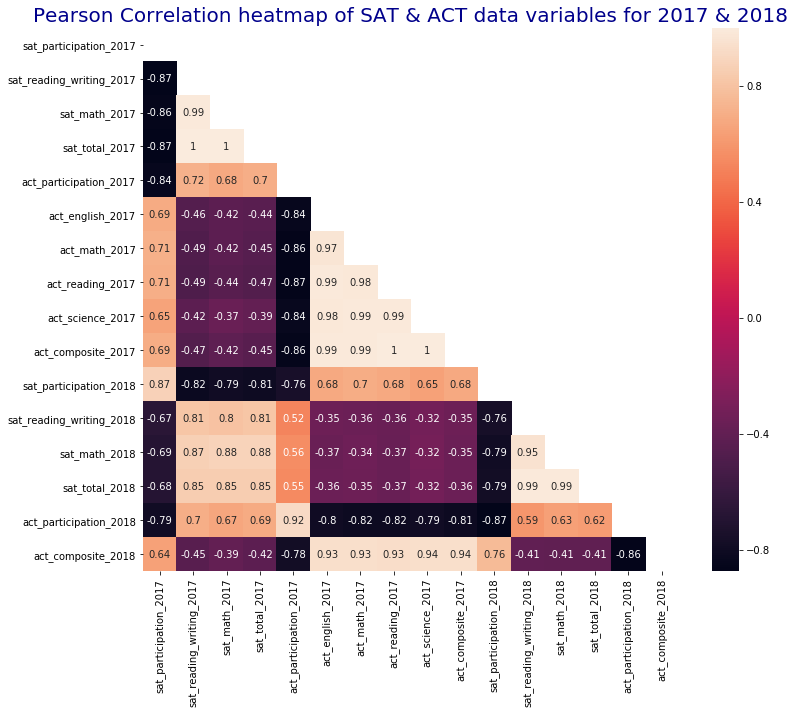

In [73]:
# Find correlation between the variables in final df
final_corr = final.corr(method='pearson') 

# Create a mask to filter out correlation between identical variables and also top half (duplicat of btm half)
  # np.zeros_like returns an array of zeros w/ same shape and type as given array. dtype arg overrides dtype to np.bool
mask_heatmap = np.zeros_like(final_corr, dtype=np.bool)
  # np.triu_indices_from returns upper triangle of array. Assign True to the upper triangle of array.
mask_heatmap[np.triu_indices_from(mask_heatmap)] = True

# Resize heatmap so annotations are not squeeze up
plt.figure(figsize=(12,10))

# Plot the heatmap
  # Positions where mask = True will be hidden
final_heatmap = sns.heatmap(final_corr, annot=True, mask=mask_heatmap)
final_heatmap.set_title('Pearson Correlation heatmap of SAT & ACT data variables for 2017 & 2018', fontsize=20, color='darkblue')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [74]:
def subplot_histograms(dataframe, list_of_columns, title): # not needed: , list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace=0.3, wspace=0.3) # Assign certain distance btw subplot rows 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(title + '_' + column)
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Frequency')
        ax[i].set_yticks(range(0,30,2))

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation Histogram

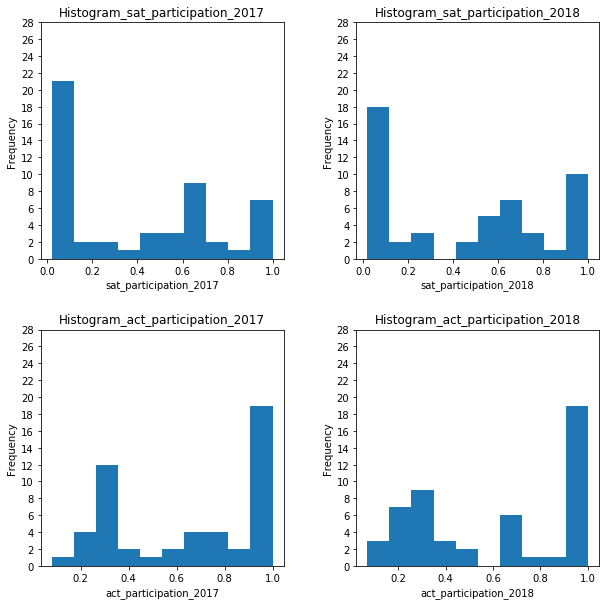

In [75]:
# Code
subplot_histograms(final, 
                   ['sat_participation_2017', 'sat_participation_2018', 
                    'act_participation_2017', 'act_participation_2018' ], 
                   'Histogram')

From 2017 to 2018:
- Overall, more states had higher participation for SAT
- More states had lower participation for ACT

### Math scores Histogram

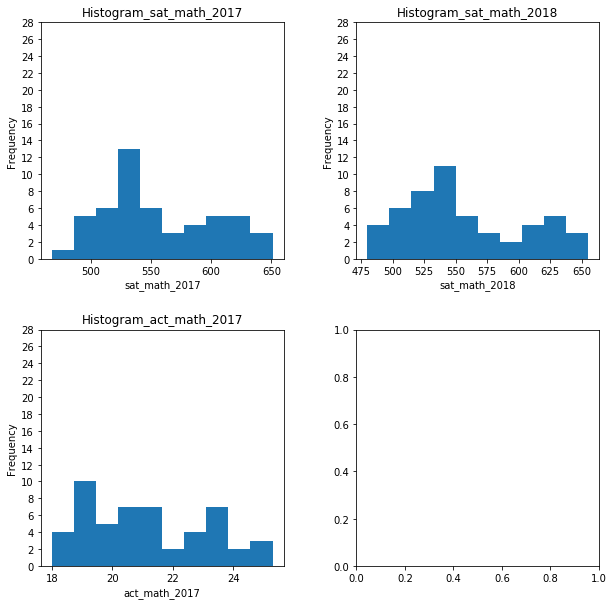

In [76]:
subplot_histograms(final, 
                   ['sat_math_2017', 'sat_math_2018', 
                    'act_math_2017' ], 
                   'Histogram')

- SAT nationwide avg is ard 525-550

### Reading/Verbal Histogram

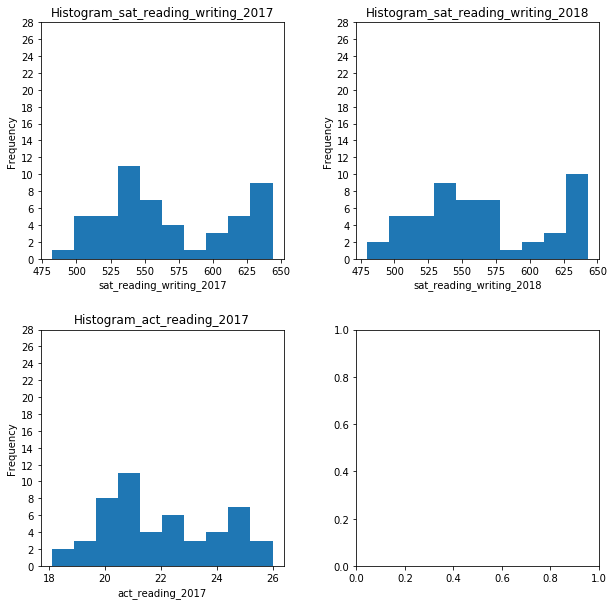

In [77]:
subplot_histograms(final, 
                   ['sat_reading_writing_2017', 'sat_reading_writing_2018', 
                    'act_reading_2017' ], 
                   'Histogram')

- Statistics not very clear from histogram. Maybe other types of plots will be clearer.

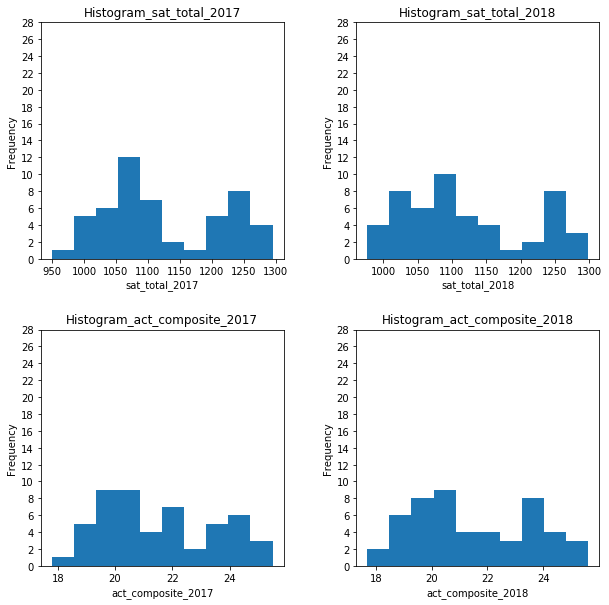

In [78]:
subplot_histograms(final, 
                   ['sat_total_2017', 'sat_total_2018', 
                    'act_composite_2017', 'act_composite_2018' ], 
                   'Histogram')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [79]:
# Code
def subplot_scatterplt(dataframe, list_of_plot, title): #, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_plot)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,10)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace=0.3, wspace=0.3) # Assign certain distance btw subplot rows 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, plot in enumerate(list_of_plot): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_plot[i][0]], dataframe[list_of_plot[i][1]]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(title + ' of ' + list_of_plot[i][0] + ' vs. ' + list_of_plot[i][1], size=15, color='darkred')
        ax[i].set_xlabel(list_of_plot[i][0], size=15)
        ax[i].tick_params(axis='both', which='major', labelsize=15)
        ax[i].set_ylabel(list_of_plot[i][1], size=15)
        # calc and plot the trendline
        z = np.polyfit(dataframe[list_of_plot[i][0]], dataframe[list_of_plot[i][1]], 1)
        p = np.poly1d(z)
        ax[i].plot(dataframe[list_of_plot[i][0]],p(dataframe[list_of_plot[i][0]]), "r--" )

### 2017 Math scores Scatter Plot + Verbal/Reading scores Scatter Plot

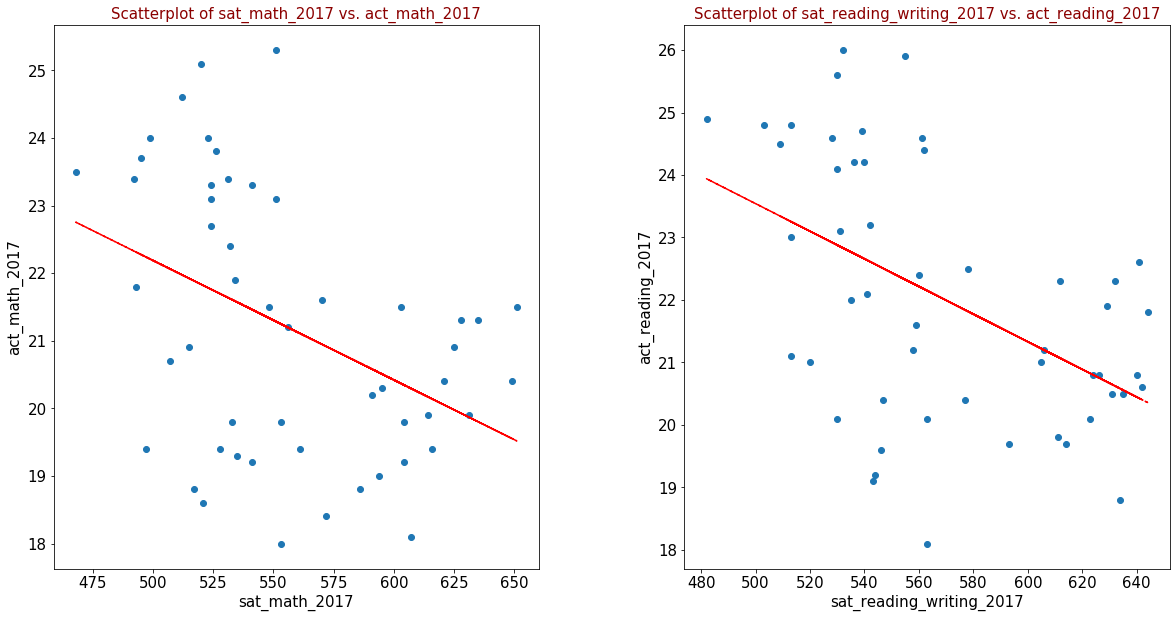

In [80]:
# SAT vs. ACT math scores for 2017
subplot_scatterplt(final, 
                  [['sat_math_2017', 'act_math_2017'],
                   ['sat_reading_writing_2017', 'act_reading_2017']],
                  'Scatterplot')

- Negative correlation observed generally SAT vs. ACT subject scores in each state.
    - i.e. in states with relatively high SAT subject scores, ACT subject scores will be relatively lower compared to ACT national avg.


### 2017 Total/Composite scores Scatter Plot

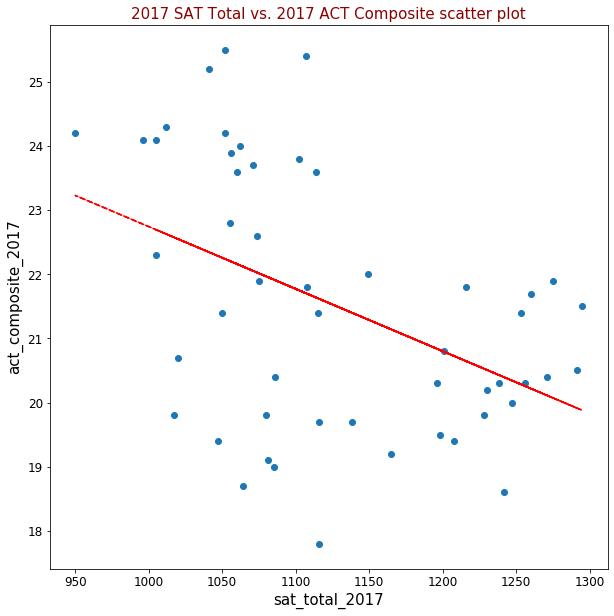

In [81]:
#SAT vs. ACT total/composite scores for 2017
plt.figure(figsize=(10,10))
plt.scatter(final['sat_total_2017'], final['act_composite_2017'])
plt.xlabel('sat_total_2017', size=15)
plt.ylabel('act_composite_2017', size=15)
plt.title('2017 SAT Total vs. 2017 ACT Composite scatter plot', size=15, color='darkred')
plt.tick_params(labelsize='large')
z = np.polyfit(final['sat_total_2017'], final['act_composite_2017'], 1)
p = np.poly1d(z)
plt.plot(final['sat_total_2017'],p(final['sat_total_2017']), "r--" )

- Again, negative trend observed for Total/Composite scores in each state. This is because Total/Composite scores are simply a summation of the subject scores.

### SAT 2017 vs. 2018 Total Scatter Plot
### ACT 2017 vs. 2018 Composite scatter plot

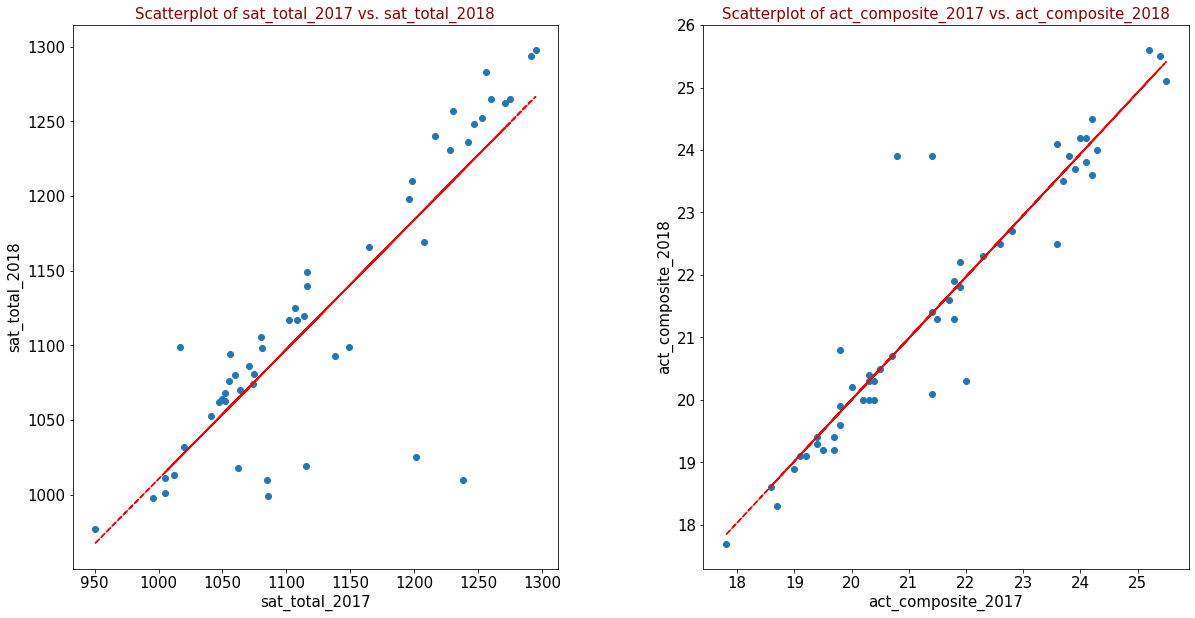

In [82]:
# Subplots of: 
# Total scores for SAT 2017 vs. 2018
# Composite scores for SAT 2017 vs. 2018
subplot_scatterplt(final, 
                  [['sat_total_2017', 'sat_total_2018'], ['act_composite_2017', 'act_composite_2018']],
                  'Scatterplot')

In [83]:
final[(final['sat_total_2017'] > 1200) & (final['sat_total_2018'] < 1050)]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.3,23.9
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.0,20.4


- Strong positive correlation between year-to-year SAT totals, likewise for ACT composite.
    - Suggests a relatively stable mean total for each state.
    - In other words, the performance of each state is quite stable from 2017 to 2018.
- Colorado and Utah are very far outliers.
    - For Colorado, this could be because of a change in state legislation between 2017 to 2018. SAT was required in 2018, which pulled the state average down significantly. (ref:https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [84]:
final.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


Text(0.5, 1.0, 'Boxplot of average nationwide SAT/ACT participation for 2017 and 2018')

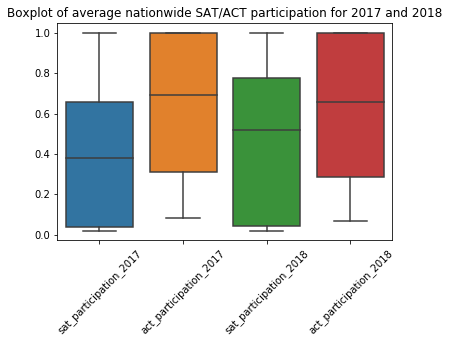

In [85]:
ax = sns.boxplot(data=final[['sat_participation_2017','act_participation_2017','sat_participation_2018','act_participation_2018']])
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Boxplot of average nationwide SAT/ACT participation for 2017 and 2018')

- SAT participation generally have lower participation rates compared to ACT, for both 2017 and 2018.
- SAT participation sees a general increase in 2018 compared to 2017.
- ACT participation remains quite stable over the 2 years.
- Lowest participation rate for SAT is lower than ACT.

In [86]:
final[['sat_participation_2017','act_participation_2017','sat_participation_2018','act_participation_2018']].describe()

,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,0.652549,0.457451,0.617255
std,0.352766,0.321408,0.373143,0.340371
min,0.020000,0.080000,0.020000,0.070000
25%,0.040000,0.310000,0.045000,0.285000
50%,0.380000,0.690000,0.520000,0.660000
75%,0.660000,1.000000,0.775000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Boxplot of average nationwide SAT subject scores for 2017 and 2018')

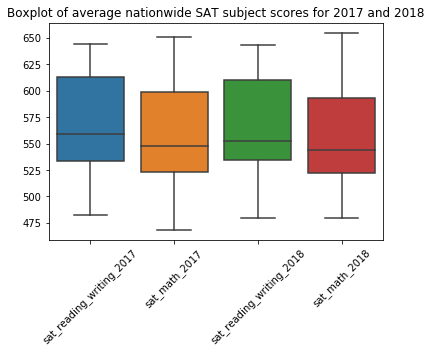

In [87]:
ax = sns.boxplot(data=final[['sat_reading_writing_2017','sat_math_2017','sat_reading_writing_2018','sat_math_2018']])
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Boxplot of average nationwide SAT subject scores for 2017 and 2018')

- Maths scores have lower median compared to reading & writing.
    - However, the range of values for maths score is also greater, with some states as a whole outperforming/underforming the median score by a wider margin than reading & writing.
- There seems to be a general decline nationwide in the performance for both subjects. 
    - This could be related to the dynamic number of test takers.

Text(0.5, 1.0, 'Boxplot of average nationwide SAT Total scores for 2017 and 2018')

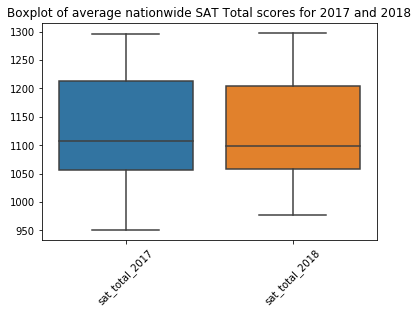

In [88]:
ax = sns.boxplot(data=final[['sat_total_2017','sat_total_2018']])
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Boxplot of average nationwide SAT Total scores for 2017 and 2018')

- Suggests a slight decline in mean scores across states from 2017 to 2018

Text(0.5, 1.0, 'Boxplot of average nationwide ACT subject scores for 2017')

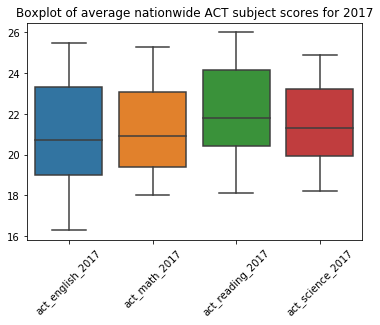

In [89]:
ax = sns.boxplot(data=final[['act_english_2017','act_math_2017','act_reading_2017','act_science_2017']])
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Boxplot of average nationwide ACT subject scores for 2017')

- ACT reading seems to be the easiest subject to score in as suggested by the box plot (i.e. highest median score). 

Text(0.5, 1.0, 'Boxplot of average nationwide ACT Composite scores for 2017 and 2018')

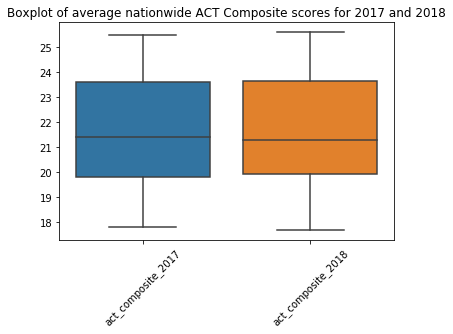

In [90]:
ax = sns.boxplot(data=final[['act_composite_2017','act_composite_2018']])
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Boxplot of average nationwide ACT Composite scores for 2017 and 2018')

- Relatively stable student performance for ACT from 2017 to 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

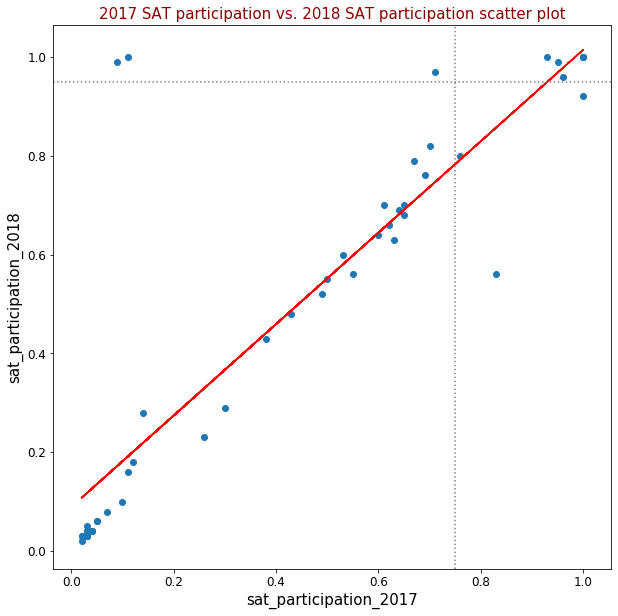

In [91]:
# Plot scatterplot of SAT participation rates in 2017 and 2018

plt.figure(figsize=(10,10))
plt.scatter(final['sat_participation_2017'], final['sat_participation_2018'])
plt.xlabel('sat_participation_2017', size=15)
plt.ylabel('sat_participation_2018', size=15)
plt.title('2017 SAT participation vs. 2018 SAT participation scatter plot', size=15, color='darkred')
plt.tick_params(labelsize='large')
z = np.polyfit(final['sat_participation_2017'], final['sat_participation_2018'], 1)
p = np.poly1d(z)
plt.plot(final['sat_participation_2017'],p(final['sat_participation_2017']), "r--" )
plt.axvline(0.75, color='grey', linestyle = ':')
plt.axhline(0.95, color='grey', linestyle = ':')

In [92]:
final[(final['sat_participation_2017'] < 0.72) & (final['sat_participation_2018'] > 0.75)][['state', 'sat_participation_2017', 'sat_participation_2018']]

,state,sat_participation_2017,sat_participation_2018
5,Colorado,0.11,1.00
13,Illinois,0.09,0.99
20,Maryland,0.69,0.76
30,New Jersey,0.70,0.82
32,New York,0.67,0.79
39,Rhode Island,0.71,0.97


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

- **Participation variable:**
    - From the histograms, it seems to be a random distribution.
    - For SAT, the strongest peaks are at the lowest bin range. For ACT, the converse is true (i.e. strongest peaks at highest bin range). For both, there are random peaks as well.
    - As it does not have any distinctive features from the various distribution types, then the only way to classify it is a random distribution.
    - This reinforces the fact that the participation rate across states depend on many factors, such as state legislation, state college/university requirements, high-school affinity to certain tests, contracts between testing body and schools etc.
    

- **Subject score & Total/Composite score variable:**
    - Histograms seems to roughly represent a bimodal distribution.
    - As can be seen from the heatmap and scatter plots, state-by-state there is a general negative correlation between SAT subject scores and corresponding ACT subject scores.
    - From the heatmap, it can also be seen that there is strong negative correlation between participation rate and score.
    - Thus, it makes sense that the distribution would be bimodal: it would depend on the participation rate in each state. E.g. for states with high participation in SAT and correspondingly low participation in ACT, the state average ACT score will be relatively high.
    

In [93]:
final.describe()

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.617255,21.496078
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340371,2.111583
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: <br>
*Defining the terms in the context of this dataset:*
- Population - total nationwide high school seniors that took SAT and/or ACT in a particular year
- Number of samples - 51 samples (50 states + District of Columbia)
- Sample size - varies by number of participants in each state, and therefore each sample's mean is calculated against different totals.

From the data visualisations done so far, none of the data variables follow a normal distribution. <br>
This is because of a few reasons:
- The sampling done from the population is not random, as it is influenced by outside factors such as state legislation, contracts with schools etc.
- The size of the sample is not constant. Each state has varying participation rates which are also derived from varying number of total high school seniors taking SAT and/or ACT. Therefore the variance in sample size is very high.
- The number of samples (51) is too low.

For the normality assumption to hold true:
- The sampling has to be random (i.e. no arbritary constraints imposed on the sampling process such as legislation)
- The number of samples has to be big enough.
- The sample size needs to be constant.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: <br>
- Math and Reading Subject scores: As the average score calculated for each state (sample) is based on different sample sizes, number of samples is not high enough, and a lot of arbitrary factors affecting randomness, sampling of these two variables **will not** follow a normal distribution.
- Participation rates: Sampling of this variable is determined in large part by the factors discussed already such as state legislation or contracts for free testing between schools and the testing body, and therefore the variable does not follow a normal distribution, as it is not random sampling.
- Estimates made from these data will not be accurate estimates for the population statistics as the samples are not random. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
- A t-test can be conducted to see if the difference between SAT and ACT average participation rates nationwide has any statistical significance.
- Null hypothesis: The difference in average participation rates has no statistical significance.
- Alt. hypothesis: There is statistical significance in ACT having greater average participation rates.

In [94]:
# Calculate the average participation rates for each test
final['sat_participation_2017'].mean()

0.39803921568627454

In [95]:
final['act_participation_2017'].mean()

0.6525490196078431

In [96]:
# Perfrom two tailed t-test for two independent samples
stats.ttest_ind(final['sat_participation_2017'], final['act_participation_2017'], equal_var=False)

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024238408285306838)

- From the t-test, it can be seen that ACT's greater average participation rate compared to SAT has statistical significance, since *p value* <= 0.05
- From research, it appears that making a certain test mandatory in the state-level contributes to the statistically significant difference.

Map of states requiring ACT/SAT or either, in 2017:

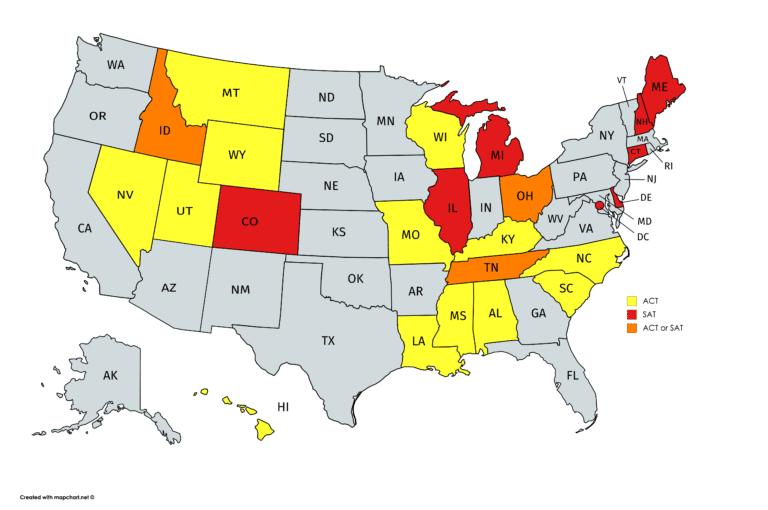
Image from: https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

- It can be seen that in 2017 the number of states making ACT mandatory (13) is higher than that for SAT (9).

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
- No, as these two tests have different score magnitudes, scoring criteria and the difficulty may vary. Therefore, it is not appropriate to perform hypothesis testing on them.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Not appropriate to conduct hypothesis testing for comparing variables, other than participation rate, for the reasons discussed above.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

SAT:
- Colorado
- Illinois
- Rhode Island

- Colorado: A high increase in participation rate from 0.11 to 1.00 from 2017 to 2018. This is because the state made SAT mandatory in 2018. source: https://www.testive.com/colorado-sat-change-2017/

- Illinois: 0.09 to 0.99. Also because of state legislation: https://www.chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/

- Rhode Island: 0.71 to 0.97. Also because of state legislation: https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores

- Before the SAT revamp in 2016, ACT had a larger number of contracts with individual states making the test mandatory, and was the most popular college admission test nationally.
- The revamp in 2016 included re-evaluating the scoring system, reconsidering the philosophy of SAT testing aptitude rather than knowledge, and access to the test.
    - Lower SAT popularity with states had a lot to do with the perception that SAT was a test of aptitude rather than knowledge (https://blog.prepscholar.com/which-states-require-the-sat)
    - Access was also harder compared to ACT, as SAT did not have the option for students to take the test on a school day. There was also no contracts with schools to offer the test for free through a fee waiver. Prep. material was also offered for free through Khan Academy.
        - source(https://www.theatlantic.com/education/archive/2015/06/should-the-sat-be-part-of-school/395417/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Key takeaways:**
- Form contracts with states to make SAT mandatory. In order to that, main points to consider are:
    - Allow for extra fee waiver allocations to incentivise low-income students to participate.
    - Convince states, universities and students that preparing for SAT tests really allow students to do well at a higher education level
    - Introducing and maintaining high quality preparatory material

In [98]:
# Filter to find states with relatively low participation
final[(final['sat_participation_2018'] < 0.20) & (final['sat_participation_2018'] > 0.10)]

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
31,New Mexico,0.11,577,561,1138,0.66,18.6,19.4,20.4,20.0,19.7,0.16,552,540,1093,0.67,19.4
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,22.0,0.18,552,547,1099,1.00,20.3


**Ohio**

- Ohio requires students to take either the SAT or ACT (https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors)
- However, a higher percentage took ACT in 2018 as seen from the data above.
- Suggestions & recommendations:
    - Collect data on participation rate across schools in the state
    - Analyse and identify possible causes for low participation rate and find ways to address those causes
    - Increase outreach to high schools in the state to promote SAT
    - Offer flexibility to schools regarding exam arrangements & scheduling
    - Convince state govt. to hold a bidding process to determine sole testing body in that state